In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from pprint import pprint

In [3]:
# Read the DICOM image using pydicom
dicom_data = pydicom.dcmread('BrainImage.dcm')
A = dicom_data.pixel_array.astype(float)

# Print image attributes
print('Image type:', type(A))
print('Shape of image array:', A.shape)

print('Data type:', A.dtype)
print('Min value:', A.min())
print('Max value:', A.max())

Image type: <class 'numpy.ndarray'>
Shape of image array: (256, 256)
Data type: float64
Min value: 0.0
Max value: 2006.0


### Metadata
ImageIO reads in data as ` Image ` objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

Patient demographics: name, age, sex, clinical information
Acquisition information: image shape, sampling rates, data type, <a herf="https://en.wikipedia.org/wiki/Medical_imaging#Imaging_modalities">modality</a> (such as X-Ray, CT or MRI)
Start this exercise by reading in the chest image and listing the available fields in the meta dictionary.

In [6]:
# Print the available metadata fields
pprint(dicom_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 178
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.34.18973.2017061518023026015291932
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.2
(0002, 0013) Implementation Version Name         SH: 'MR_VB17A'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND']
(0008, 0012) Instance Creation Date              DA: '20170615'
(0008, 0013) Instance Creation Time              TM: '180231.843000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID  

In [47]:
# Convert to double format
Img = A.astype(float)

print('Data type:', Img.dtype)
print('Min value:', Img.min())
print('Max value:', Img.max())

Data type: float64
Min value: 0.0
Max value: 2006.0


### Plot Images
The most crucial principle of image analysis is to look at your images. Matplotlib's `imshow()` function provides a simple way to achieve this. Understanding a few key arguments will enhance your image visualization:

- `cmap` controls the color mappings for each value. The "gray" colormap is common, but many others are available.
- `vmin` and `vmax` regulate the color contrast between values. Adjusting these parameters can mitigate the influence of extreme values.
- `plt.axis('off')` removes axis and tick labels from the image.
For this exercise, plot the MRI \ CT scan and investigate the effects of different parameters.

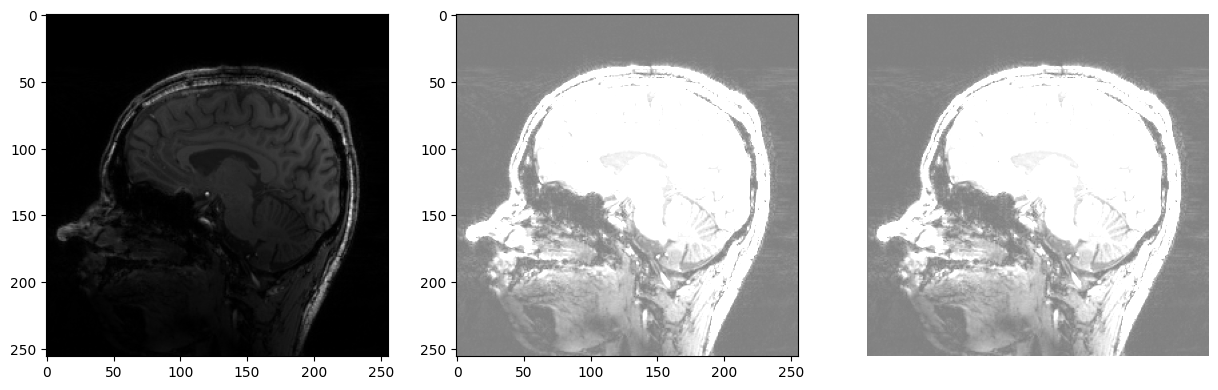

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
# Draw the image in grayscale
ax[0].imshow(A, cmap='gray');

# Draw the image with greater contrast
ax[1].imshow(A, cmap='gray', vmin=-200, vmax=200);

# Remove axis ticks and labels
ax[2].imshow(A, cmap='gray', vmin=-200, vmax=200);
ax[2].axis('off');

### N-dimensional images
N-dimensional images involve considerations such as shape, sampling, and field of view:

- <b>Image Shape:</b> This refers to the number of elements along each axis of the image.
  
- <b>Sampling Rate:</b> It indicates the physical space covered by each element in the image.
  
- <b>Field of View:</b> This represents the physical space covered along each axis.

Understanding these parameters is crucial for proper analysis and interpretation of N-dimensional images.